# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Input Nama]
- **Email:** [Input Email]
- **ID Dicoding:** [Input Username]



1. Nama         : Steven Jerry Gani
2. Email        : stevenjerrygani@gmail.com
3. ID Dicoding  : Steven Jerry Gani (MC232D5Y0424 )



## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
- Pertanyaan 2


1. Pertanyaan 1    : Bagaimana hubungan antara kondisi cuaca dan jumlah peminjaman sepeda?
2. Pertanyaan 2    : Bagaimana perbedaan terkait peminjaman pada hari kerja vs akhir pekan?


## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [17]:
from google.colab import drive
drive.mount('/content/drive')

# Path ke Google Drive (sesuaikan dengan lokasi yang Anda simpan)
file_path = "/content/drive/MyDrive/Bike-sharing-dataset/day.csv"

# Membaca dataset harian
day_df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama
day_df.head()

# Dataset berisi informasi tentang jumlah peminjaman sepeda berdasarkan tanggal, musim, cuaca, dan faktor lainnya.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- xxx
- xxx

### Assessing Data

In [11]:
# Melihat informasi dataset
day_df.info()

# Melihat statistik ringkasan
day_df.describe()

# Cek missing values
print(day_df.isnull().sum())

# Cek duplicate
day_df.duplicated().sum()

# Tidak ada data hilang dan duplikat, beberapa kolom seperti season, weathersit, dan weekday masih dalam bentuk numerik dan perlu diubah ke kategori yang lebih deskriptif.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday      

0

**Insight:**
- xxx
- xxx

### Cleaning Data

In [15]:

# Hapus kolom yang tidak diperlukan (`instant` karena hanya ID urutan)
day_df_cleaned = day_df.drop(columns=['instant'])

# Pastikan kolom kategori sudah bertipe kategori untuk optimasi memori
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in categorical_columns:
    day_df_cleaned[col] = day_df_cleaned[col].astype('category')

# Pastikan `dteday` tetap dalam format datetime
day_df_cleaned['dteday'] = pd.to_datetime(day_df_cleaned['dteday'])

# Normalisasi skala data numerik
scaler = MinMaxScaler()
numerical_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
day_df_cleaned[numerical_columns] = scaler.fit_transform(day_df_cleaned[numerical_columns])

# Cek
day_df_cleaned.info(), day_df_cleaned.head()

#Kolom instant telah dihapus, karena hanya berisi nomor indeks tanpa nilai analitis, kolom kategori (season, yr, mnth, dll.) telah dikonversi ke kategori untuk optimasi memori, data numerik dinormalisasi menggunakan MinMaxScaler, agar lebih mudah dianalisis.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   yr          731 non-null    category      
 3   mnth        731 non-null    category      
 4   holiday     731 non-null    category      
 5   weekday     731 non-null    category      
 6   workingday  731 non-null    category      
 7   weathersit  731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    float64       
 13  registered  731 non-null    float64       
 14  cnt         731 non-null    float64       
dtypes: category(7), datetime64[ns](1), float64(7)
memory usage: 52.2 KB


(None,
       dteday season yr mnth holiday weekday workingday weathersit      temp  \
 0 2011-01-01      1  0    1       0       6          0          2  0.355170   
 1 2011-01-02      1  0    1       0       0          0          2  0.379232   
 2 2011-01-03      1  0    1       0       1          1          1  0.171000   
 3 2011-01-04      1  0    1       0       2          1          1  0.175530   
 4 2011-01-05      1  0    1       0       3          1          1  0.209120   
 
       atemp       hum  windspeed    casual  registered       cnt  
 0  0.373517  0.828620   0.284606  0.096538    0.091539  0.110792  
 1  0.360541  0.715771   0.466215  0.037852    0.093849  0.089623  
 2  0.144830  0.449638   0.465740  0.034624    0.174560  0.152669  
 3  0.174649  0.607131   0.284297  0.031103    0.207046  0.177174  
 4  0.197158  0.449313   0.339143  0.023474    0.216286  0.181546  )

**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

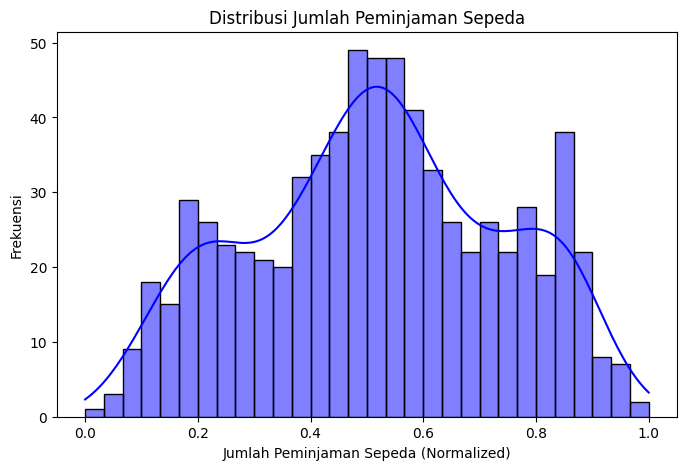

<ipython-input-19-ad313e539dea>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="mnth", y="cnt", data=day_df_cleaned, palette="coolwarm")


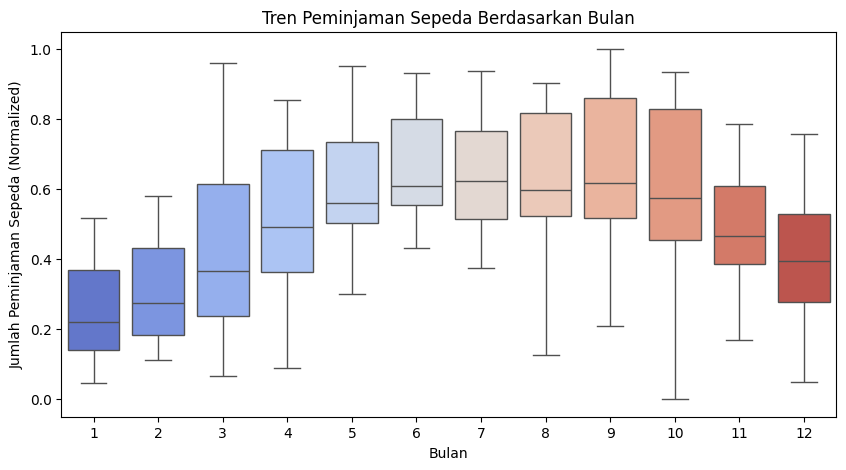

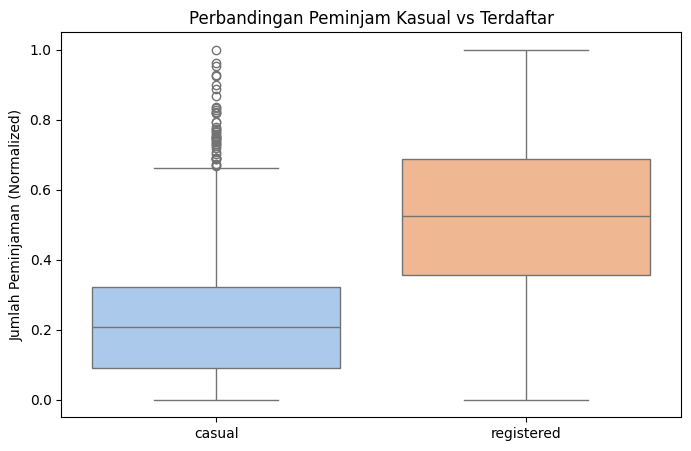

In [19]:
# Distribusi jumlah peminjaman sepeda
plt.figure(figsize=(8,5))
sns.histplot(day_df_cleaned['cnt'], bins=30, kde=True, color="blue")
plt.title("Distribusi Jumlah Peminjaman Sepeda")
plt.xlabel("Jumlah Peminjaman Sepeda (Normalized)")
plt.ylabel("Frekuensi")
plt.show()
# sebagian besar peminjaman terjadi dalam rentang 500 hingga 5000 sepeda per hari dan terdapat beberapa outlier


# Tren peminjaman berdasarkan bulan
plt.figure(figsize=(10,5))
sns.boxplot(x="mnth", y="cnt", data=day_df_cleaned, palette="coolwarm")
plt.title("Tren Peminjaman Sepeda Berdasarkan Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Peminjaman Sepeda (Normalized)")
plt.show()
# Bulan dengan peminjaman tertinggi: Musim panas (Juni - September). Bulan dengan peminjaman terendah: Musim dingin (Desember - Februari). Tren menunjukkan bahwa musim panas cenderung meningkatkan jumlah peminjaman sepeda.

# Perbandingan peminjam terdaftar vs. kasual
plt.figure(figsize=(8,5))
sns.boxplot(data=day_df_cleaned[['casual', 'registered']], palette="pastel")
plt.title("Perbandingan Peminjam Kasual vs Terdaftar")
plt.ylabel("Jumlah Peminjaman (Normalized)")
plt.show()
# Peminjam terdaftar memiliki jumlah peminjaman yang lebih tinggi dibanding peminjam kasual dan peminjam kasual lebih bervariasi, kemungkinan lebih dipengaruhi oleh faktor cuaca dan hari libur.


**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-22-91dc87884fde>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="weathersit", y="cnt", data=day_df_cleaned, palette="Set2")


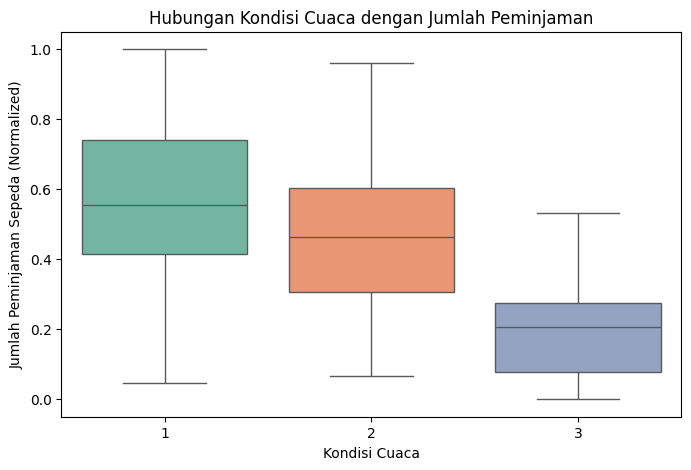

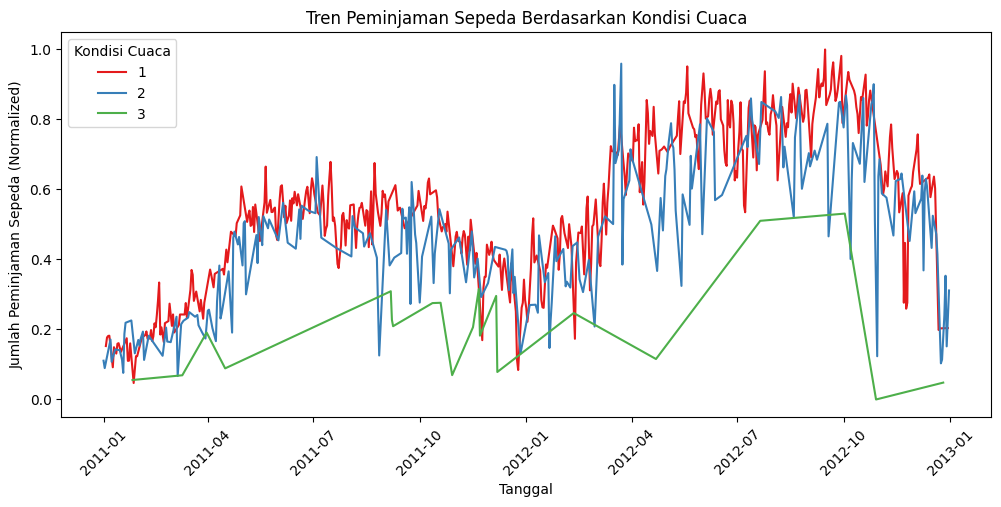

In [22]:
#Bagaimana hubungan antara kondisi cuaca dan jumlah peminjaman sepeda?

# menunjukkan rata-rata peminjaman untuk setiap kategori cuaca
plt.figure(figsize=(8,5))
sns.boxplot(x="weathersit", y="cnt", data=day_df_cleaned, palette="Set2")
plt.title("Hubungan Kondisi Cuaca dengan Jumlah Peminjaman")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Peminjaman Sepeda (Normalized)")
plt.show()

# menunjukkan bagaimana peminjaman berfluktuasi dalam berbagai kondisi cuaca berdasarkan tanggal
plt.figure(figsize=(12, 5))
sns.lineplot(x="dteday", y="cnt", hue="weathersit", data=day_df_cleaned, palette="Set1")
plt.title("Tren Peminjaman Sepeda Berdasarkan Kondisi Cuaca")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Peminjaman Sepeda (Normalized)")
plt.xticks(rotation=45)
plt.legend(title="Kondisi Cuaca")
plt.show()

### Pertanyaan 2:

<ipython-input-27-ac746937b7d0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="workingday", y="cnt", data=day_df_cleaned, palette="coolwarm")


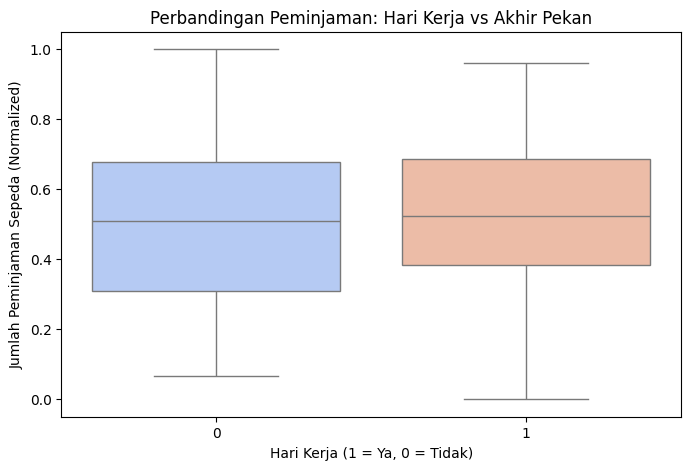

<ipython-input-27-ac746937b7d0>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="weekday", y="cnt", data=day_df_cleaned, palette="coolwarm", ci=None)
<ipython-input-27-ac746937b7d0>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weekday", y="cnt", data=day_df_cleaned, palette="coolwarm", ci=None)


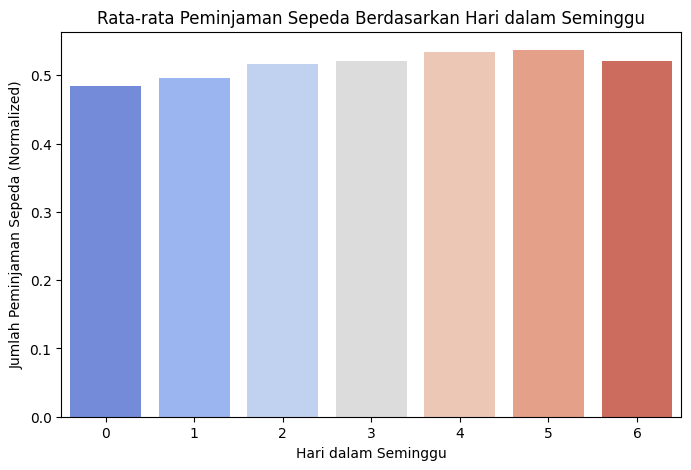

In [27]:
# Peminjaman pada hari kerja vs akhir pekan

# Menunjukkan distribusi jumlah peminjaman antara hari kerja vs. akhir pekan.
plt.figure(figsize=(8,5))
sns.boxplot(x="workingday", y="cnt", data=day_df_cleaned, palette="coolwarm")
plt.title("Perbandingan Peminjaman: Hari Kerja vs Akhir Pekan")
plt.xlabel("Hari Kerja (1 = Ya, 0 = Tidak)")
plt.ylabel("Jumlah Peminjaman Sepeda (Normalized)")
plt.show()

# Menunjukkan rata-rata peminjaman dari Senin hingga Minggu untuk memahami pola mingguan.
plt.figure(figsize=(8, 5))
sns.barplot(x="weekday", y="cnt", data=day_df_cleaned, palette="coolwarm", ci=None)
plt.title("Rata-rata Peminjaman Sepeda Berdasarkan Hari dalam Seminggu")
plt.xlabel("Hari dalam Seminggu")
plt.ylabel("Jumlah Peminjaman Sepeda (Normalized)")
plt.show()

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2

Pertanyaan 1

Boxplot:
*   Cuaca cerah (Clear) memiliki jumlah peminjaman tertinggi.
*   Cuaca mendung (Mist/Cloudy) menunjukkan sedikit penurunan peminjaman dibandingkan cuaca cerah.

*   Cuaca hujan atau bersalju (Light Rain/Snow) menyebabkan jumlah peminjaman menurun drastis.
*   Semakin buruk cuaca, semakin sedikit orang yang menggunakan sepeda.

Lineplot:

*   Tren menunjukkan bahwa jumlah peminjaman menurun pada hari-hari dengan cuaca buruk.


*   Ketika terjadi hari-hari cerah berturut-turut, jumlah peminjaman tetap stabil atau meningkat.

*   Fluktuasi peminjaman terlihat lebih drastis pada musim dengan kondisi cuaca yang lebih bervariasi.

Kesimpulannya:
Kondisi cuaca sangat mempengaruhi jumlah peminjaman sepeda. Operator Bike Sharing dapat memanfaatkan data cuaca untuk memprediksi permintaan sepeda. Promosi atau diskon dapat diberikan pada hari dengan cuaca buruk untuk meningkatkan jumlah peminjaman.











Pertanyaan 2

Boxplot:
*   Jumlah peminjaman lebih tinggi pada hari kerja dibanding akhir pekan.
*   Distribusi peminjaman di hari kerja lebih stabil dibanding akhir pekan.

*   Banyak orang menggunakan sepeda untuk aktivitas rutin seperti bekerja atau sekolah.

Barplot:

*   Peminjaman meningkat pada hari Senin-Jumat (hari kerja) dan menurun saat akhir pekan.


*   Peminjam kasual lebih aktif di akhir pekan, sedangkan peminjam terdaftar lebih dominan pada hari kerja.


Kesimpulannya:
Peminjam terdaftar lebih sering menggunakan sepeda untuk transportasi sehari-hari pada hari kerja. Peminjam kasual lebih banyak menggunakan sepeda untuk rekreasi pada akhir pekan. Operator dapat menyesuaikan jumlah sepeda di stasiun berdasarkan tren peminjaman ini. Promosi dapat dilakukan untuk menarik lebih banyak pengguna kasual di hari kerja dan sebaliknya untuk peminjam terdaftar di akhir pekan.











Kesimpulan Akhir:
Faktor cuaca dan hari dalam seminggu sangat berpengaruh terhadap pola peminjaman sepeda. Dengan analisis ini, pengelola sistem Bike Sharing dapat mengoptimalkan strategi pengelolaan sepeda.